In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import astropy.io.fits as fits
import scipy.ndimage as scind
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize
import matplotlib.colorbar as clb
import function_plot as f_plt

In [2]:
work_dir='/export/home/extragal/zibetti/no_ownCloud/SteMaGE/data/SEDlibraries/Sandage_v4.1_Zfix_noburst_cb16MILES_1M/'
f_name=work_dir+'sandage_varZ_v4.1_m62fix_noburst_1M_spec_dcombnull_001.fits'
f_par=work_dir+'sandage_varZ_v4.1_m62fix_noburst_1M_spec_dcombnull_001_physpar_wagef.fits'

In [3]:
prefix_file='sandage_varZ_v4.1_m62fix_noburst_1M_spec_dcombnull'
#sandage_varZ_v4.1_m62fix_noburst_1M_spec_dcombnull
_file_par=work_dir+prefix_file+'_{:03d}_physpar_wagef.fits'
_hdul_par=fits.open(_file_par.format(1))
hdul=fits.open(f_name)

age10=_hdul_par[1].data['age10']
age50=_hdul_par[1].data['age50']
age90=_hdul_par[1].data['age90']
for i_chunk in range (2,51):

    _hdul_par=fits.open(_file_par.format(i_chunk))

    _age10=_hdul_par[1].data['age10']
    _age50=_hdul_par[1].data['age50']
    _age90=_hdul_par[1].data['age90']
    age50=np.append(age50, _age50)
    age10=np.append(age10, _age10)
    age90=np.append(age90, _age90)
    
dage_n=np.log10((age10-age90)/age50)
age10=np.log10(age10)
age90=np.log10(age90)
age50=np.log10(age50)




In [4]:
sel_models=(((age50)<9.05) & ((age50)>9.0))
wl=hdul[0].data
sel_wl=(wl<5600) & (wl>3800)
wl_sel=wl[sel_wl]
N_row=np.sum(sel_models)
N_col=np.size(wl_sel)
matrix_spec=np.zeros(shape=(N_row, N_col))
first_row=0
 

for i_chunk in range(0,50):
    _file_spec=work_dir+prefix_file+'_{:03d}.fits'
    _hdul_spec=fits.open(_file_spec.format(i_chunk+1))
    _sel_mod=sel_models[i_chunk*20000:(i_chunk+1)*20000]
    _y_data=_hdul_spec[1].data
    _y_data=_y_data[..., sel_wl]
    last_row=np.sum(_sel_mod)+first_row
    
    matrix_spec[first_row:last_row,...]=_y_data[_sel_mod,...]
    first_row=last_row

dage_n_sub=dage_n[sel_models]
idx_ref=np.argmin(dage_n_sub)

Text(0.5, 1.0, '$9.0 dex<age_{50}<9.5 dex, Z=Z_{\\odot}$')

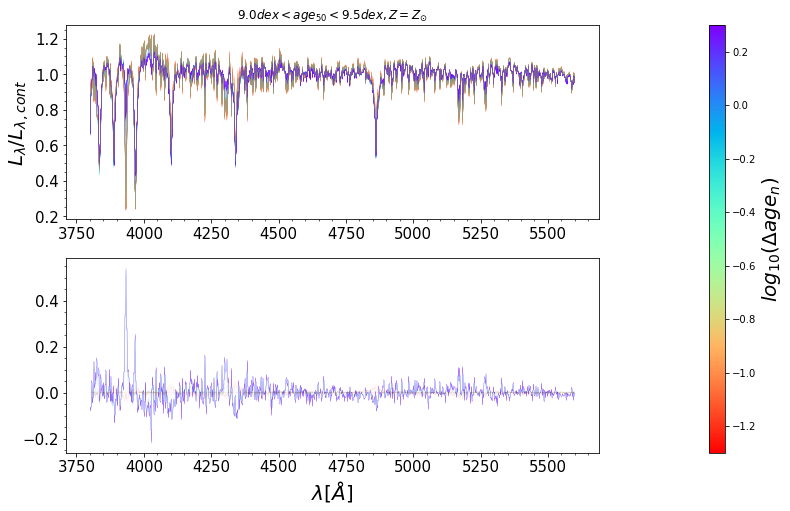

In [5]:
cm2inch = 1/2.54
widths=[5,0.15]
heights=[1,1]
#gs=dict(width_ratios=widths, height_ratios=heights)
cm2inch = 1/2.54 
fig = plt.figure(figsize=(30*cm2inch,20*cm2inch))
#gs = fig.add_gridspec(2, 2, height_ratios=heights, width_ratios=widths, hspace=0.2, wspace=0.3)
gs = fig.add_gridspec(2, 2, height_ratios=heights, width_ratios=widths, hspace=0.2, wspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

ax3 = fig.add_subplot(gs[:, 1])
#ax1.plot(wl[sel_wl1], y_data[100, sel_wl1]-scind.median_filter(y_data[100, sel_wl1], size=500), alpha = 0.1,linewidth = 0.05)

for i_model in range(0,N_row):
    if(sel_models[i_model]):
    
        c=cm.rainbow_r((dage_n_sub[i_model]-(-1.3))/((0.3)-(-1.3)))
        ax1.plot(wl_sel, matrix_spec[i_model, ...]/scind.median_filter(matrix_spec[i_model, ...], size=500), alpha=0.5, linewidth=0.05, c=c)

        ax2.plot(wl_sel, (matrix_spec[i_model, ...]/scind.median_filter(matrix_spec[i_model, ...], size=500))-(matrix_spec[idx_ref, ...]/scind.median_filter(matrix_spec[idx_ref, ...], size=500)), alpha = 0.1,linewidth = 0.05, c=c)

#ax1.plot(wl, y_data[indexes[idx_ref], ...]-scind.median_filter(y_data[indexes[idx_ref], ...], size=500), color='yellow')
#ax2.plot(wl_sel, (y_data[idx_ref, sel_wl]))
NORM=Normalize(vmin=-1.3, vmax=0.3)
clb.ColorbarBase(ax3, cmap=cm.rainbow_r, norm=NORM)
#ax1.set_facecolor('#d8dcd6')
#ax2.set_facecolor('#d8dcd6')

ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

ax3.tick_params(labelsize=10)
ax1.minorticks_on()

ax2.minorticks_on()

ax2.set_xlabel(r'$\lambda [\AA]$', size=20)
ax1.set_ylabel(r'$L_{\lambda}/L_{\lambda,cont}$', size=20)
ax3.set_ylabel(r'$log_{10}(\Delta age_{n})$', size=20)
ax1.set_title(r"$9.0 dex<age_{50}<9.5 dex, Z=Z_{\odot}$")
#ax2.set_ylim([-0.01,0.01])

In [6]:
#fig.savefig('/export/home/extragal/erossi/ownCloud/TESI/articolo/spec_m62_age9_1M.png')

In [7]:
snr=20
wl_0=5500
wl_1=5550
sel_wl_sub=((wl_sel<5550) & (wl_sel>5500))
wl_sub=wl_sel[sel_wl_sub]
wl_mid=np.zeros(np.size(wl_sub)-1)
dwl=np.zeros(np.size(wl_sub)-1)
for i in range(0, np.size(wl_sub)-1):
    wl_mid[i]=(wl_sub[i]+wl_sub[i+1])/2
    dwl=wl_sub[i+1]-wl_sub[i]


In [8]:
delta_spec=np.zeros(N_row)

In [9]:
N_col

2000

In [10]:
np.random.seed(0)

y_data_interp=np.interp(wl_mid, wl_sub, matrix_spec[idx_ref, sel_wl_sub])
err_spec=np.sum((y_data_interp*dwl)/((wl_1-wl_0)*snr))
err_spec_norm=err_spec/scind.median_filter(matrix_spec[idx_ref, ...], size=500)
_pert=np.random.normal(scale=err_spec_norm, size=np.size((matrix_spec[idx_ref, ...]/scind.median_filter(matrix_spec[idx_ref, ...], size=500))))

spec_ref_pert=(matrix_spec[idx_ref, ...]/scind.median_filter(matrix_spec[idx_ref, ...], size=500))+_pert
sel_ref=(dage_n_sub<-1.0)
for i_mod in range(0, N_row):
    y_data_interp=np.interp(wl_mid, wl_sub, matrix_spec[i_mod, sel_wl_sub])
    err_spec=np.sum((y_data_interp*dwl)/((wl_1-wl_0)*snr))
    err_spec_norm=err_spec/scind.median_filter(matrix_spec[i_mod, ...], size=500)
    _pert=np.random.normal(scale=err_spec_norm, size=np.size((matrix_spec[i_mod, ...]/scind.median_filter(matrix_spec[idx_ref, ...], size=500))))
    spec_mod_pert=(matrix_spec[i_mod, ...]/scind.median_filter(matrix_spec[i_mod, ...], size=500))+_pert
    for i_wl in range(0, N_col):
        #_std_ref=np.std((matrix_spec[sel_ref, i_wl]/scind.median_filter(matrix_spec[sel_ref, i_wl], size=500))+_pert[sel_ref])
        delta_spec[i_mod]=delta_spec[i_mod]+((spec_mod_pert[i_wl]-spec_ref_pert[i_wl])/err_spec_norm[i_wl])**2


In [11]:
sel_ref=(dage_n_sub<-1.0)
std_ref=np.std(delta_spec[sel_ref])
mean_ref=np.mean(delta_spec[sel_ref])
perc_84_ref=np.percentile(delta_spec[sel_ref], 84)

In [12]:
bins=50
bin_edges=np.histogram(dage_n_sub, bins=bins)[1]
bin_centre=np.zeros(bins)
perc_delta_84=np.zeros(bins)
std=np.zeros(bins)
perc_delta_16=np.zeros(bins)

for i in range(0,bins):
    bin_centre[i]=(bin_edges[i]+bin_edges[i+1])/2
    _sel=((dage_n_sub<bin_edges[i+1]) & (dage_n_sub>bin_edges[i]))
    perc_delta_84[i]=np.percentile(delta_spec[_sel], 84)
    perc_delta_16[i]=np.percentile(delta_spec[_sel], 16)

In [13]:
inter_delta=lambda x: np.interp(x, bin_centre, perc_delta_16-(mean_ref+std_ref))
dage_n_lim=f_plt.bisection(inter_delta, -1.0, 1.2, 0.01)

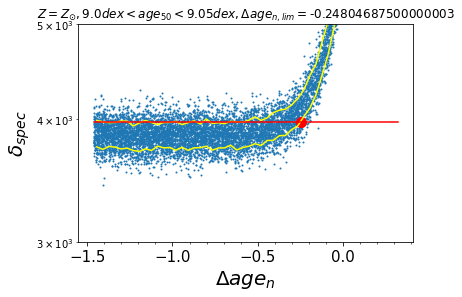

In [16]:
plt.scatter(dage_n_sub, delta_spec, s=1)
plt.plot(bin_centre, perc_delta_16, c='yellow')
plt.plot(bin_centre, perc_delta_84, c='yellow')

plt.plot([np.min(dage_n_sub), np.max(dage_n_sub)], [(mean_ref+std_ref), (mean_ref+std_ref)], c='red')
#plt.plot([dage_n_lim, dage_n_lim], [0,0.01], c='red')
plt.xlabel(r'$\Delta age_n$', size =20)
plt.ylabel(r'$\delta_{spec}$', size=20)
plt.tick_params(labelsize=15)
plt.minorticks_on()
plt.title(r'$Z=Z_{\odot}, 9.0 dex<age_{50}<9.05 dex, \Delta age_{n,lim}=$'+ str(dage_n_lim))
plt.yscale('log')
plt.ylim([3e3, 5e3])
plt.scatter(dage_n_lim, (mean_ref+std_ref), c='red', s=100)

#plt.savefig('/export/home/extragal/erossi/ownCloud/TESI/articolo/delta_m62_age9_1M.png')